# 🎯 K-Means Clustering - Customer Segmentation

Welcome to your hands-on K-Means clustering exercise! In this notebook, you'll discover hidden patterns in customer data to segment customers into meaningful groups.

## 🔍 Key Questions to Answer
1. **What is the optimal number of clusters?** (using the elbow method)
2. **How many customers are in each cluster?** (using K-Means clustering)

## 📊 Dataset Info
- **Rows**: 200 customers from a retail store
- **Features**: Annual Income (k$) and Spending Score (1-100)
- **Goal**: Segment customers for targeted marketing campaigns

Let's discover customer patterns! 🔍✨

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print("🎨 Plot styling configured!")

✅ All libraries imported successfully!
🎨 Plot styling configured!


## 📊 Step 1: Load and Explore the Data

Let's load the customer dataset and understand what we're working with.

In [3]:
# Load the customer dataset
df = pd.read_csv('customer_data.csv')

print(f"✅ Dataset loaded successfully!")
print(f"📊 Shape: {df.shape}")
print(f"📋 Columns: {list(df.columns)}")

# Display first few rows
print("\n🔍 First 5 rows:")
print(df.head())

✅ Dataset loaded successfully!
📊 Shape: (200, 5)
📋 Columns: ['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score']

🔍 First 5 rows:
   CustomerID  Gender  Age  Annual_Income  Spending_Score
0           1    Male   19          15000              39
1           2    Male   21          15000              81
2           3  Female   20          16000               6
3           4  Female   23          16000              77
4           5  Female   31          17000              40


In [4]:
# Dataset overview
print("=== DATASET OVERVIEW ===")
print(df.info())

print("\n=== STATISTICAL SUMMARY ===")
print(df.describe())

=== DATASET OVERVIEW ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

=== STATISTICAL SUMMARY ===
       CustomerID         Age  Annual_Income  Spending_Score
count  200.000000  200.000000     200.000000      200.000000
mean   100.500000   38.850000   60555.000000       50.200000
std     57.879185   13.969007   26266.454044       25.823522
min      1.000000   18.000000   15000.000000        1.000000
25%     50.750000   28.750000   41500.000000       34.750000
50%    100.500000   36.000000   61000.000000       50.000000
75%    150.250000   49.000000   78000.000000       7

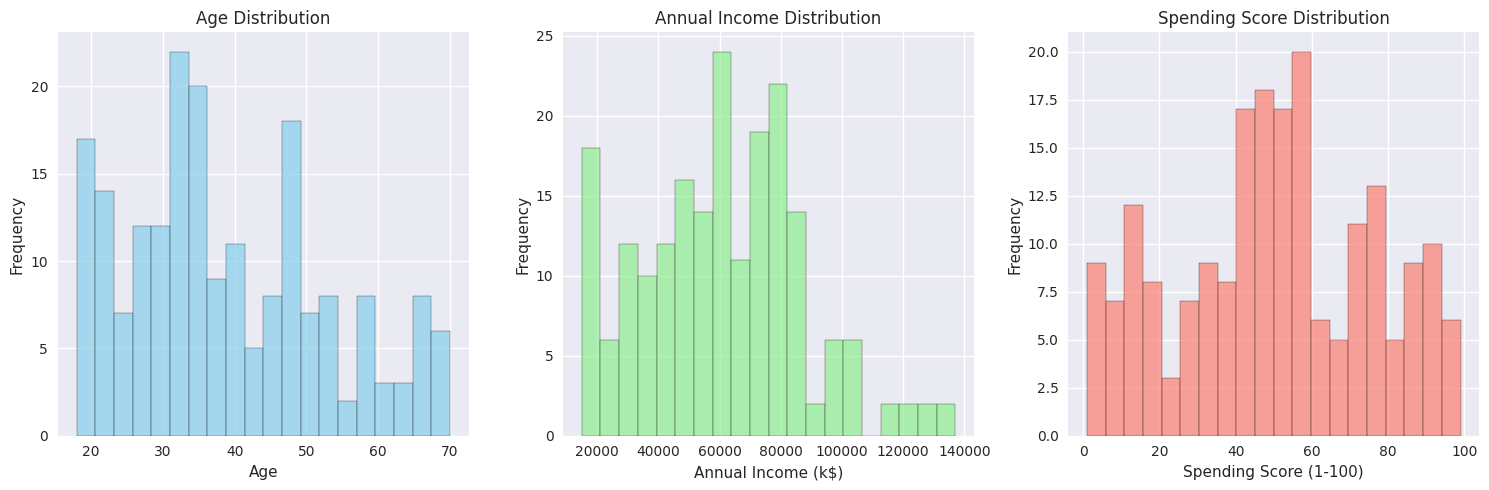

📊 Data distributions visualized!


In [5]:
# Visualize the data distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Age distribution
axes[0].hist(df['Age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Annual Income distribution
axes[1].hist(df['Annual_Income'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1].set_title('Annual Income Distribution')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Frequency')

# Spending Score distribution
axes[2].hist(df['Spending_Score'], bins=20, alpha=0.7, color='salmon', edgecolor='black')
axes[2].set_title('Spending Score Distribution')
axes[2].set_xlabel('Spending Score (1-100)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("📊 Data distributions visualized!")

## 🎯 Step 2: Prepare Data for Clustering

For customer segmentation, we'll focus on Annual Income and Spending Score as our clustering features.

In [6]:
# Select features for clustering
features = ['Annual_Income', 'Spending_Score']
X = df[features].values

print(f"✅ Selected features: {features}")
print(f"📊 Clustering data shape: {X.shape}")

# Display the clustering data
print("\n🔍 First 5 rows of clustering data:")
print(X[:5])

✅ Selected features: ['Annual_Income', 'Spending_Score']
📊 Clustering data shape: (200, 2)

🔍 First 5 rows of clustering data:
[[15000    39]
 [15000    81]
 [16000     6]
 [16000    77]
 [17000    40]]


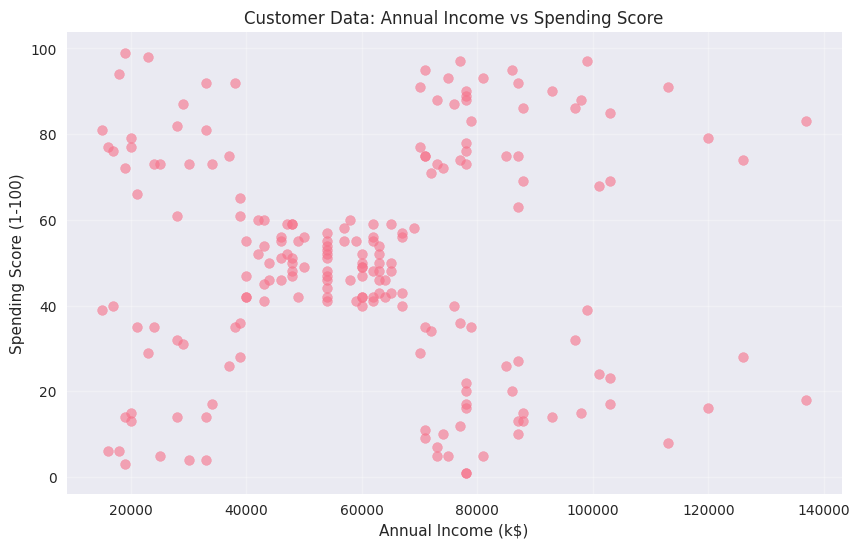

🎨 Raw data visualized! Can you spot any potential clusters?


In [7]:
# Visualize the raw data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Data: Annual Income vs Spending Score')
plt.grid(True, alpha=0.3)
plt.show()

print("🎨 Raw data visualized! Can you spot any potential clusters?")

## 🔍 Question 1: What is the optimal number of clusters?

Before applying K-Means, we need to determine the optimal number of clusters using the elbow method. The elbow method helps us find the "sweet spot" where adding more clusters doesn't significantly improve the clustering quality.

**Your task**: Use the elbow method to identify the optimal number of clusters by looking for the "elbow" point in the WCSS curve.

In [8]:
# Calculate Within-Cluster Sum of Squares (WCSS) for different k values
wcss = []
k_range = range(1, 11)

print("🔍 Calculating WCSS for different k values...")

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(f"k={k}: WCSS = {kmeans.inertia_:.0f}")

print("\n✅ WCSS calculation completed!")

🔍 Calculating WCSS for different k values...
k=1: WCSS = 137295527704
k=2: WCSS = 48717212501
k=1: WCSS = 137295527704
k=2: WCSS = 48717212501


k=3: WCSS = 23548630291
k=4: WCSS = 13238616290
k=5: WCSS = 8483534864
k=6: WCSS = 5038073046
k=7: WCSS = 3919156260
k=8: WCSS = 2817751195
k=9: WCSS = 2304941643
k=10: WCSS = 1868447193

✅ WCSS calculation completed!


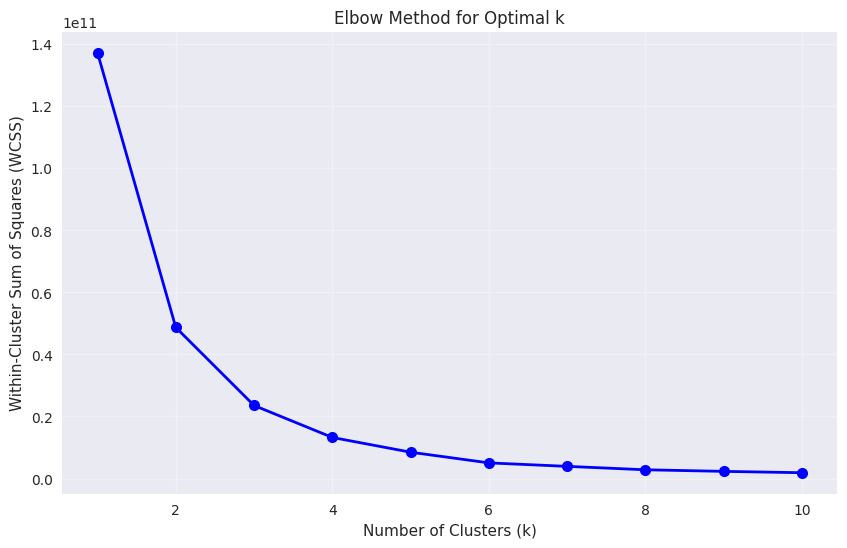

📊 Elbow curve plotted!
🤔 Based on the elbow curve, what do you think is the optimal number of clusters?


In [9]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True, alpha=0.3)

plt.show()

print("📊 Elbow curve plotted!")
print("🤔 Based on the elbow curve, what do you think is the optimal number of clusters?")

## 🎯 Question 2: How many customers are in each cluster?

Now let's apply K-Means with the optimal number of clusters you identified and find out how many customers belong to each cluster.

**Your task**: Apply K-Means clustering and report the size of each cluster (both count and percentage).

In [ ]:
# Apply K-Means with optimal k Based on elbow method
# optimal_k = 

print(f"🎯 Applying K-Means with k={optimal_k}...")

# TODO: Create KMeans model with optimal_k clusters
# kmeans = 
# cluster_labels = 

# Add cluster labels to original dataframe
df['Cluster'] = cluster_labels

# Display results
print(f"✅ K-Means clustering completed!")
print(f"📊 Cluster centers:")
print(kmeans.cluster_centers_)
print(f"\n🎯 Final WCSS: {kmeans.inertia_:.0f}")

🎯 Applying K-Means with k=5...
✅ K-Means clustering completed!
📊 Cluster centers:
[[4.22380952e+04 5.06666667e+01]
 [7.87368421e+04 5.03684211e+01]
 [1.09700000e+05 5.20000000e+01]
 [6.02244898e+04 4.92244898e+01]
 [2.20000000e+04 4.96562500e+01]]

🎯 Final WCSS: 8483534864


In [11]:
# Analyze cluster sizes
print("=== CLUSTER ANALYSIS ===")
cluster_counts = df['Cluster'].value_counts().sort_index()
print("Cluster sizes:")
for cluster, count in cluster_counts.items():
    print(f"  Cluster {cluster}: {count} customers ({count/len(df)*100:.1f}%)")

# Display cluster statistics
print("\n📊 Cluster Statistics:")
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"  Average Income: ${cluster_data['Annual_Income'].mean():.0f}k")
    print(f"  Average Spending Score: {cluster_data['Spending_Score'].mean():.1f}")
    print(f"  Age Range: {cluster_data['Age'].min()}-{cluster_data['Age'].max()}")

print(f"\n🎉 Analysis complete! You now have the answers to both questions!")

=== CLUSTER ANALYSIS ===
Cluster sizes:
  Cluster 0: 42 customers (21.0%)
  Cluster 1: 57 customers (28.5%)
  Cluster 2: 20 customers (10.0%)
  Cluster 3: 49 customers (24.5%)
  Cluster 4: 32 customers (16.0%)

📊 Cluster Statistics:

Cluster 0:
  Average Income: $42238k
  Average Spending Score: 50.7
  Age Range: 18-70

Cluster 1:
  Average Income: $78737k
  Average Spending Score: 50.4
  Age Range: 19-59

Cluster 2:
  Average Income: $109700k
  Average Spending Score: 52.0
  Age Range: 28-54

Cluster 3:
  Average Income: $60224k
  Average Spending Score: 49.2
  Age Range: 18-68

Cluster 4:
  Average Income: $22000k
  Average Spending Score: 49.7
  Age Range: 19-67

🎉 Analysis complete! You now have the answers to both questions!


## 📋 Summary

Congratulations! You've successfully completed the K-Means clustering analysis. You should now be able to answer:

1. **What is the optimal number of clusters?** _(Look at your elbow curve)_
2. **How many customers are in each cluster?** _(Check the cluster sizes above)_

🎯 **Ready to submit your answers?** Make sure you have:
- ✅ Identified the optimal number of clusters from the elbow method
- ✅ Determined the size of each cluster (count and percentage)
- ✅ Understood the customer distribution across clusters

Great work on mastering K-Means clustering! 🎉